In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from cycler import cycler
from termcolor import colored
import pandas

In [ ]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

""")

# Characteristic equation for TM and TE modes

In [ ]:
def adguide(nf, nc, ns, lmbd, a, mode):
  mmax = 5
  tol = 1e-10
  r = 0.3

  if (mode=='TM'):
    pc = (nf/nc)**2
    ps = (nf/ns)**2
  else:
    pc = 1
    ps = 1

  delta = (ns**2-nc**2)/(nf**2-ns**2)
  k0 = 2*np.pi/lmbd
  NA = np.sqrt(nf**2-ns**2)
  R = k0*a*NA

  M = int(np.ceil((2*R-np.arctan(pc*np.sqrt(delta)))/np.pi))
  m = np.arange(0,M)

  u = R*np.ones(M)
  v = np.zeros(M)
  w = R*np.sqrt(delta)*np.ones(M)

  Nit = 1

  while True:
    F = 0.5*(np.pi*m + np.arctan(ps*v/u) + np.arctan(pc*w/u))
    u_new = r*F + (1-r)*u
    if np.any(np.abs(u_new-u) <= tol):
        break
    Nit = Nit + 1
    u = u_new
    v = np.sqrt(R**2-u**2)
    w = np.sqrt(delta*R**2+v**2)
    if Nit > 1000:
        break

  kf = u/a
  gamma_s = v/a
  gamma_c = w/a
  be = np.sqrt((nf*k0)**2 - kf**2)
  return be,be/k0, kf, gamma_s, gamma_c, M

In [ ]:
def Vb(b, sigma, pc, ps, m):
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))  

In [ ]:
def b2neff(ns, NA, b):
  return np.sqrt(b*NA**2+ns**2)

# Initial parameters

## Material and waveguide

In [ ]:
nf = 3.48 # core
ns = 1.45 # substract
nc = 1.00 # cladding
a  = 0.45e-6 # width
lmbd = 1.55e-6 # wavelength

## Material, frequency and modal parameters

In [ ]:
pc = (nf/nc)**2
ps = (nf/ns)**2
k0 = 2*np.pi/lmbd
NA = np.sqrt(nf**2-ns**2)
V  = a*k0*NA
delta = (ns**2-nc**2)/(nf**2-ns**2)

In [ ]:
neff = np.linspace(ns, nf, 1000)
u = a*k0*np.sqrt(nf**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

# TE Mode

In [ ]:
f1TE = u*(v+w)/(u**2-v*w)
f1TE[:-1][np.diff(f1TE) < -5] = np.nan

f2   = np.tan(2*u)
f2[:-1][np.diff(f2) < -5] = np.nan

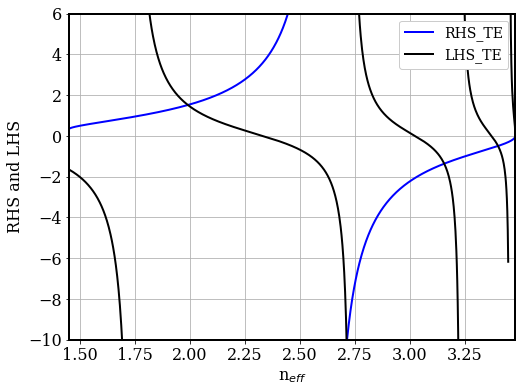

In [ ]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

fig1 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(neff, f1TE, 'b', linewidth = 2, label = 'RHS_TE')
plt.plot(neff, f2, 'k', linewidth = 2, label = 'LHS_TE')
plt.xlim([ns, nf])
plt.ylim([-10,6])
plt.xlabel(r'n$_{eff}$')
plt.ylabel(r'RHS and LHS')
plt.grid(True)
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)
plt.savefig('ass_dlt_guide_TE.pdf', bbox_inches='tight')

## Characteristic equation

In [ ]:
betaTE,neffTE,kfTE,alsTE,alcTE,MTE = adguide(nf, nc, ns, lmbd, a, 'TE')
df = pandas.DataFrame({"beta": betaTE, 
                       "neff": neffTE,
                       "kf": kfTE,
                       "als": alsTE,
                       "alc": alcTE,})
df.index.names = ['TE']
df

,beta,neff,kf,als,alc
TE,,,,,
0,1.378786e+07,3.401330,2.982551e+06,1.247223e+07,1.317850e+07
1,1.279502e+07,3.156406,5.940387e+06,1.136503e+07,1.213591e+07
2,1.099704e+07,2.712861,8.835496e+06,9.294411e+06,1.022265e+07
3,8.070174e+06,1.990832,1.157035e+07,5.529824e+06,6.978215e+06


## Universal curve

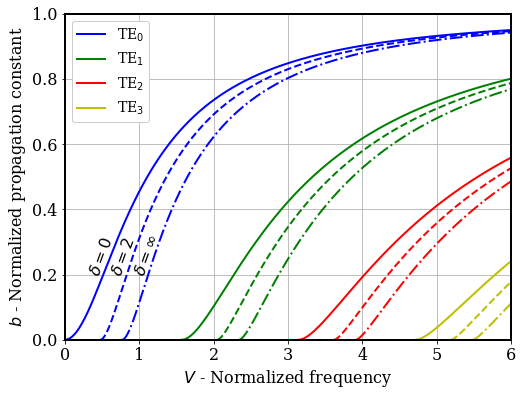

In [ ]:
fig3 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgry')

b  = np.linspace(0, .99, 1000)

sigma = 0
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), linewidth = 2, label = 'TE$_{%d}$' %(m))
  plt.plot(Vc, b, linewidth = 2, label = 'TE$_{%d}$' %(m))

sigma = 2
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), '--', linewidth = 2)
  plt.plot(Vc, b, '--', linewidth = 2)

sigma = 1000
for m in range(4):
  Vc = Vb(b, sigma, 1, 1, m)
  #plt.plot(Vc, b2neff(ns, NA, b), '-.', linewidth = 2)
  plt.plot(Vc, b, '-.', linewidth = 2)

plt.text(0.3,0.2,r'$\delta = 0$', rotation = 70)
plt.text(0.6,0.2,r'$\delta = 2$', rotation = 70)
plt.text(0.9,0.2,r'$\delta = \infty$', rotation = 70)

plt.xlim([0,6])
#plt.ylim([ns,nf])
plt.ylim([0,1])
plt.xlabel(r'$V$ - Normalized frequency')
#plt.ylabel(r'$n_{eff}$ - Effective index')
plt.ylabel(r'$b$ - Normalized propagation constant')
plt.grid(True)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)
plt.savefig('ass_dlt_guide_carc_equation_TE.pdf', bbox_inches='tight')

## Cutoff frequency

In [ ]:
M = (2*V-np.arctan(np.sqrt(delta)))/np.pi
print('Function argument: %5.2f' %(M))
M = np.floor(M)
print('Higher mode: %d' %M)
print('Number of TE modes: %d' %(M+1))
print('Norm. frequency: %5.2f' %V)

Function argument:  3.57
Higher mode: 3
Nuber of TE modes: 4
Norm. frequency:  5.77


In [ ]:
print('Cutoff frequency - TE modes:')
for i in range(int(M+2)):
  Vc = (i*np.pi+np.arctan(np.sqrt(delta)))/2
  fc = Vc/(2*np.pi*a/c*NA)  
  if (i==(M+1)):
    print(colored('TE%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c/fc, Vc), 'red'))
  else:
    print('TE%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c/fc, Vc))
print('V = %4.2f' %V)

Cutoff frequency - TE modes:
TE0 -  5.37 THz - 55822.61 nm (Vc = 0.16)
TE1 - 58.02 THz - 5167.25 nm (Vc = 1.73)
TE2 - 110.67 THz - 2709.00 nm (Vc = 3.30)
TE3 - 163.31 THz - 1835.70 nm (Vc = 4.87)
TE4 - 215.96 THz - 1388.19 nm (Vc = 6.44)
V = 5.77


## Field intensity

In [ ]:
hzsz = 600
h    = 1.0
nHzP = int(np.round(hzsz/(h+1)))
xc1  = np.linspace(-(h+1)*a,-a, int((hzsz-nHzP)/2)) # substract
xn   = np.linspace(-a,      a,  nHzP) # core
xc2  = np.linspace( a, (h+1)*a, int((hzsz-nHzP)/2)) # cladding

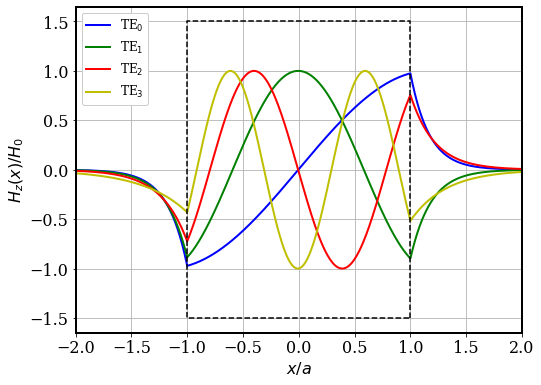

In [ ]:
fig8 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Ho = 1
for i in range(int(MTE)):    
    phi = 0.5*(i*np.pi + np.arctan(alcTE[i]/kfTE[i]) - np.arctan(alsTE[i]/kfTE[i]))
    Hzc2 = Ho *  np.sin(kfTE[i] * a  + phi) * np.exp(-alcTE[i] * (xc2 - a)) # cladding
    Hzc  = Ho *  np.sin(kfTE[i] * xn + phi)  # core
    Hzc1 = Ho * -np.sin(kfTE[i] * a  - phi) * np.exp(alsTE[i] * (xc1 + a)) # substract 
    Hzc  = np.concatenate([Hzc1,Hzc,Hzc2])
    maxHzn = 1.0#np.max(abs(Hzc))
    plt.plot(np.concatenate([xc1,xn,xc2])/a, Hzc/maxHzn, label = 'TE$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
#plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_z(x)/H_0}$')

plt.savefig('te_mode_Hz_field.pdf', bbox_inches='tight')

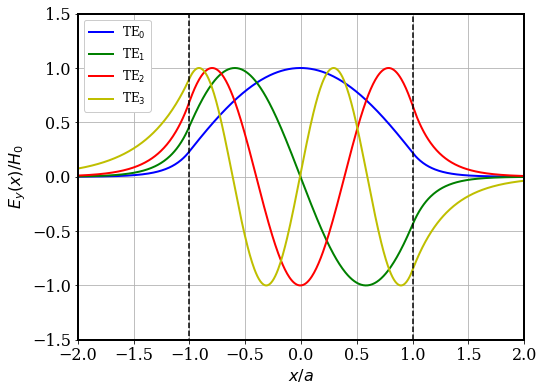

In [ ]:
fig9 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
       
Ho = 1
for i in range(MTE):    
    phi = 0.5*(i*np.pi + np.arctan(alcTE[i]/kfTE[i]) - np.arctan(alsTE[i]/kfTE[i]))    
    Eyc2 = Ho * 1/alcTE[i] * np.sin(kfTE[i] * a  + phi) * np.exp(-alcTE[i] * (xc2 - a)) # cladding
    Eyc  = Ho * 1/kfTE[i]  * np.cos(kfTE[i] * xn + phi)  # core
    Eyc1 = Ho * 1/alsTE[i] * np.sin(kfTE[i] * a  - phi) * np.exp(alsTE[i] * (xc1 + a)) # substract
    Eyc = np.concatenate([Eyc1,Eyc,Eyc2])
    maxEyc = np.max(Eyc)
    plt.plot(np.concatenate([xc1,xn,xc2])/a, Eyc/maxEyc, label = 'TE$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)/H_0}$')

plt.savefig('te_mode_Ey_field.pdf', bbox_inches='tight')

# TM Mode

In [ ]:
f1TM = u*(ps*v+pc*w)/(u**2-ps*pc*v*w)
f1TM[:-1][np.diff(f1TM) < -5] = np.nan

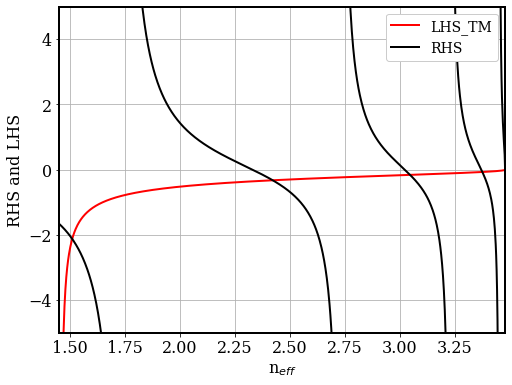

In [ ]:
fig2 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.plot(neff, f1TM, 'r', linewidth = 2, label = 'LHS_TM')
plt.plot(neff, f2, 'k', linewidth = 2, label = 'RHS')
plt.xlim([ns, nf])
plt.ylim([-5,5])
plt.xlabel(r'n$_{eff}$')
plt.ylabel(r'RHS and LHS')
plt.grid(True)
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)
plt.savefig('ass_dlt_guide_TM.pdf', bbox_inches='tight')

## Characteristic equation

In [ ]:
betaTM,neffTM,kfTM,alsTM,alcTM,MTM = adguide(nf, nc, ns, lmbd, a, 'TM')
df = pandas.DataFrame({"beta": betaTM, 
                       "neff": neffTM,
                       "kf": kfTM,
                       "als": alsTM,
                       "alc": alcTM,})
df.index.names = ['TM']
df

,beta,neff,kf,als,alc
TM,,,,,
0,1.356609e+07,3.346622,3.868061e+06,1.222662e+07,1.294630e+07
1,1.220547e+07,3.010969,7.072999e+06,1.069695e+07,1.151266e+07
2,9.735756e+06,2.401715,1.020862e+07,7.761198e+06,8.851707e+06
3,6.127053e+06,1.511484,1.270669e+07,1.729746e+06,4.594404e+06


## Universal curve

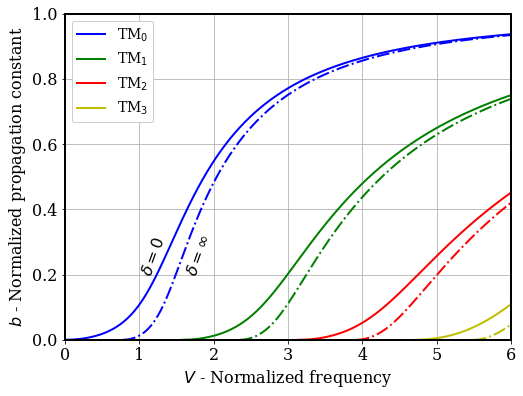

In [ ]:
fig4 = plt.figure(figsize=(8,6))
plt.rc('font', **font)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgry')

sigma = 0
for m in range(4):
  Vc = Vb(b, sigma, 4, 4, m)
  plt.plot(Vc, b, linewidth = 2, label = 'TM$_{%d}$' %(m))

sigma = 1000
for m in range(4):
  Vc = Vb(b, sigma, 4, 4, m)
  plt.plot(Vc, b, '-.', linewidth = 2)

plt.text(1.0,0.2,r'$\delta = 0$', rotation = 70)
plt.text(1.6,0.2,r'$\delta = \infty$', rotation = 70)

plt.xlim([0,6])
plt.ylim([0,1])
plt.xlabel(r'$V$ - Normalized frequency')
plt.ylabel(r'$b$ - Normalized propagation constant')
plt.grid(True)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 14)
plt.savefig('ass_dlt_guide_carc_equation_TM.pdf', bbox_inches='tight')

## Cutoff frequency

In [ ]:
M = (2*V-np.arctan(pc*np.sqrt(delta)))/np.pi
print('Function argument: %5.2f' %(M))
M = np.floor(M)
print('Higher mode: %d' %M)
print('Number of TM modes: %d' %(M+1))
print('Norm. frequency: %5.2f' %V)

Function argument:  3.25
Higher mode: 3
Number of TM modes: 4
Norm. frequency:  5.77


In [ ]:
print('Cutoff frequency - modos TM:')
for i in range(int(M+2)):
  Vc = (i*np.pi+np.arctan(pc*np.sqrt(delta)))/2
  fc = Vc/(2*np.pi*a/c*NA)  
  if (i==(M+1)):
    print(colored('TM%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c/fc, Vc), 'red'))
  else:
    print('TM%d - %5.2f THz - %5.2f nm (Vc = %4.2f)' %(i, 1e-12*fc, 1e9*c/fc, Vc))
print('V = %4.2f' %V)

Cutoff frequency - modos TM:
TM0 - 22.24 THz - 13481.41 nm (Vc = 0.66)
TM1 - 74.88 THz - 4003.38 nm (Vc = 2.23)
TM2 - 127.53 THz - 2350.72 nm (Vc = 3.81)
TM3 - 180.18 THz - 1663.85 nm (Vc = 5.38)
TM4 - 232.83 THz - 1287.62 nm (Vc = 6.95)
V = 5.77


## Field intensity

In [ ]:
hzsz = 600
h    = 1.0
nHzP = int(np.round(hzsz/(h+1)))
xc1  = np.linspace(-(h+1)*a,-a, int((hzsz-nHzP)/2)) # substract
xn   = np.linspace(-a,      a,  nHzP) # core
xc2  = np.linspace( a, (h+1)*a, int((hzsz-nHzP)/2)) # cladding

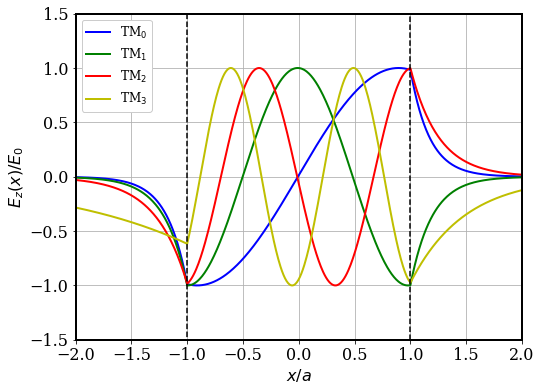

In [ ]:
fig10 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Eo = 1
for i in range(MTM):
    phi = 0.5*(i*np.pi + np.arctan(pc*alcTM[i]/kfTM[i]) - np.arctan(ps*alsTM[i]/kfTM[i]))
    Ezc2 = Eo *  np.sin(kfTM[i] * a  + phi) * np.exp(-alcTM[i] * (xc2 - a)) # cladding
    Ezc  = Eo *  np.sin(kfTM[i] * xn + phi)  # core
    Ezc1 = Eo * -np.sin(kfTM[i] * a  - phi) * np.exp(alsTM[i] * (xc1 + a)) # substract
    plt.plot(np.concatenate([xc1,xn,xc2])/a, np.concatenate([Ezc1,Ezc,Ezc2]), label = 'TM$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_z(x)/E_0}$')

plt.savefig('tm_mode_Ez_field.pdf', bbox_inches='tight')

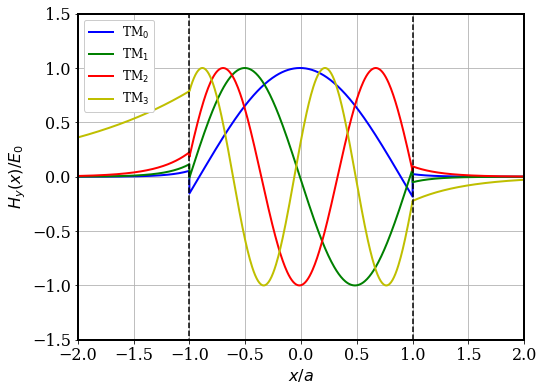

In [ ]:
fig11 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

Eo = 1
for i in range(MTM):
    phi = 0.5*(i*np.pi + np.arctan(pc*alcTM[i]/kfTM[i]) - np.arctan(ps*alsTM[i]/kfTM[i]))
    Hyc2 = Eo * (nc**2)/alcTM[i] * np.sin(kfTM[i] * a  + phi) * np.exp(-alcTM[i] * (xc2 - a)) # cladding
    Hyc  = Eo * (nf**2)/kfTM[i]  * np.cos(kfTM[i] * xn + phi)  # core
    Hyc1 = Eo * (ns**2)/alsTM[i] * np.sin(kfTM[i] * a  - phi) * np.exp(alsTM[i] * (xc1 + a)) # substract
    plt.plot(np.concatenate([xc1,xn,xc2])/a, np.concatenate([Hyc1,Hyc,Hyc2])/Hyc.max(), label = 'TM$_{%d}$' %(i), linewidth = 2)

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', lineWidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)/E_0}$')

plt.savefig('tm_mode_Hy_field.pdf', bbox_inches='tight')

# Comparation - TE and TM modes

In [ ]:
for i in range(int(MTE)):
  lmbdcTE = (4*np.pi*a*NA)/(i*np.pi + np.arctan(np.sqrt(delta)))
  print('TE%d - %.2f nm (Vc = %.2f)' %(i, 1e9*lmbdcTE, 2*a*np.pi/lmbdcTE*NA))

for i in range(int(MTM)):
  lmbdcTM = (4*np.pi*a*NA)/(i*np.pi + np.arctan(pc*np.sqrt(delta)))
  print(colored('TM%d - %.2f nm (Vc = %.2f)' %(i, 1e9*lmbdcTM, 2*a*np.pi/lmbdcTM*NA), 'red'))

TE0 - 55822.61 nm (Vc = 0.16)
TE1 - 5167.25 nm (Vc = 1.73)
TE2 - 2709.00 nm (Vc = 3.30)
TE3 - 1835.70 nm (Vc = 4.87)
TM0 - 13481.41 nm (Vc = 0.66)
TM1 - 4003.38 nm (Vc = 2.23)
TM2 - 2350.72 nm (Vc = 3.81)
TM3 - 1663.85 nm (Vc = 5.38)


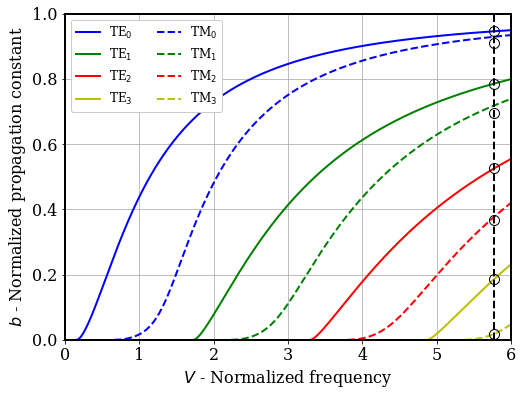

In [ ]:
fig5 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

sigma = (ns**2-nc**2)/(nf**2-ns**2)
for m in range(MTE):
  plt.plot(Vb(b, sigma, 1, 1, m), b, '-', linewidth = 2, label = 'TE$_{%d}$' %(m))
for m in range(MTM):
  plt.plot(Vb(b, sigma, pc, ps, m), b, '--', linewidth = 2, label = 'TM$_{%d}$' %(m))

bTE = 1 - (kfTE*a/V)**2
bTM = 1 - (kfTM*a/V)**2

plt.plot(np.array([V,V]), np.array([0,1]), 'k--', linewidth = 2)
plt.plot(V*np.ones(MTE), bTE, 'ko', fillstyle = 'none', markersize = 10)
plt.plot(V*np.ones(MTM), bTM, 'ko', fillstyle = 'none', markersize = 10)

plt.xlim([0,np.ceil(V)])
plt.ylim([0,1])
plt.grid(True)

plt.xlabel(r'$V$ - Normalized frequency')
plt.ylabel(r'$b$ - Normalized propagation constant')
plt.legend(loc = 'upper left', ncol = 2, framealpha = 1, fontsize = 12)
plt.savefig('ass_dlt_guide_carc_equation_TM_TE.pdf', bbox_inches='tight')

# Confinement factor

### TE MODE

\begin{equation}
  \Gamma = \frac{P_{core}}{P_t} = \frac{1 + \frac{\sin^2(u - \phi)}{2v} + \frac{\sin^2(u + \phi)}{2w}}{1 + \frac{1}{2v} + \frac{1}{2w}}
\end{equation}

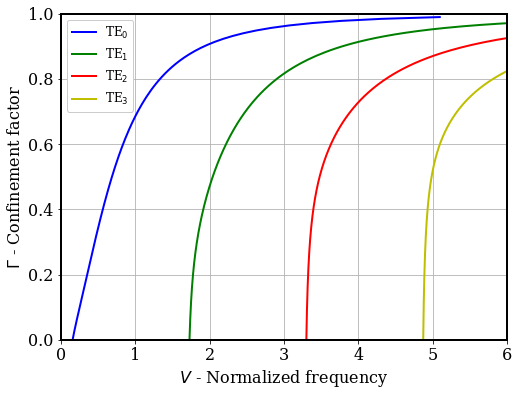

In [ ]:
fig6 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

b = np.logspace(-10, -0.03, 1000, endpoint=True)
for i in range(MTM):  
  Vc  = Vb(b, delta, 1, 1, i)
  vv  = np.sqrt(b)*Vc
  uv  = np.sqrt(1-b)*Vc
  wv  = np.sqrt(delta*Vc**2 + vv**2)
  phi = 0.5*(i*np.pi + np.arctan(wv/uv) - np.arctan(vv/uv))
  pcore = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv+ phi))**2
  pt    = 1 + 1/(2*vv) + 1/(2*wv)
  plt.plot(Vc, pcore/pt, linewidth = 2, label = 'TE$_{%d}$' %(i))

plt.ylabel(r'$\Gamma$ - Confinement factor')
plt.xlabel(r'$V$ - Normalized frequency')
plt.xlim([0, np.ceil(V)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.grid(True)

plt.savefig('confinement_factor_TE.pdf', bbox_inches='tight')

### TM MODE

\begin{equation}
  \Gamma = \frac{\frac{1}{2w} \sin^2(u + \phi) + \frac{1}{2v} \sin^2(u - \phi) + 1}{p_c \frac{1}{2w} \cos^2(u + \phi) + p_s \frac{1}{2v} \cos^2(u - \phi) + \frac{1}{2w}\sin^2(u + \phi) + \frac{1}{2v} \sin^2(u - \phi) + 1}
\end{equation}

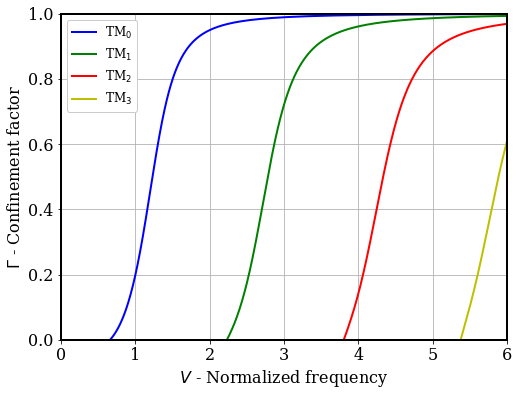

In [ ]:
fig7 = plt.figure(figsize=(8,6))
plt.rc('font', **font)

for i in range(MTE):  
  Vc  = Vb(b, delta, pc, ps, i)
  vv  = np.sqrt(b)*Vc
  uv  = np.sqrt(1-b)*Vc
  wv  = np.sqrt(delta*Vc**2 + vv**2)
  phi = 0.5*(i*np.pi + np.arctan(pc*wv/uv) - np.arctan(ps*vv/uv))
  pcore = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv + phi))**2
  pt    = 1 + 1/(2*vv) * (np.sin(uv - phi))**2 + 1/(2*wv) * (np.sin(uv + phi))**2 + ps/(2*vv) * (np.cos(uv - phi))**2 + pc/(2*wv) * (np.cos(uv + phi))**2
  plt.plot(Vc, pcore/pt, linewidth = 2, label = 'TM$_{%d}$' %(i))

plt.ylabel(r'$\Gamma$ - Confinement factor')
plt.xlabel(r'$V$ - Normalized frequency')
plt.xlim([0, np.ceil(V)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.grid(True)

plt.savefig('confinement_factor_TM.pdf', bbox_inches='tight')

# Group and phase velocity

\begin{align}
  v_p &= \frac{c}{n_{eff}} \\
  n_g &= n_{eff}-\frac{\mathrm{d}n_{eff}}{\mathrm{d}\lambda} \lambda_0
\end{align}

<ipython-input-5-dc4dd9ca199f>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))
<ipython-input-5-dc4dd9ca199f>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))
<ipython-input-5-dc4dd9ca199f>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))
<ipython-input-5-dc4dd9ca199f>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt(b+sigma)/np.sqrt(1-b)) + np.arctan(ps*np.sqrt(b)/np.sqrt(1-b)))


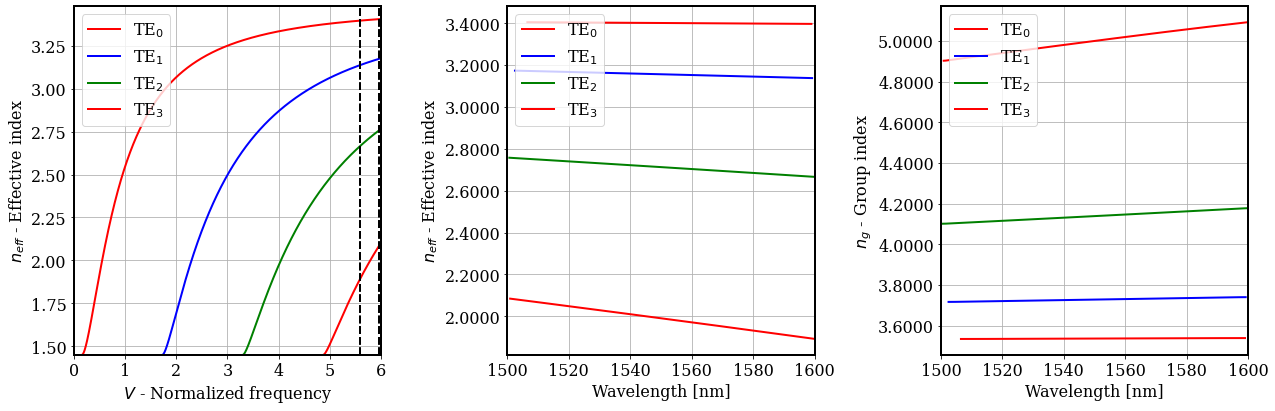

In [ ]:
import matplotlib.ticker as ticker
fig12, axs12 = plt.subplots(1, 3, figsize=(18,6))
plt.rc('font', **font)

b = np.linspace(0,1,2000)
V_1500nm = a*2*np.pi/1500e-9*NA
V_1600nm = a*2*np.pi/1600e-9*NA
M = int(np.ceil((2*V_1500nm-np.arctan(np.sqrt(delta)))/np.pi))

plt.rcParams['axes.prop_cycle'] = cycler(color='rbg')

for i in range(M):
  Vc    = Vb(b, delta, 1, 1, i)
  neffc = b2neff(ns, NA, b)  

  axs12[0].plot(Vc, neffc, label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[0].plot(np.array([V_1500nm,V_1500nm]), [ns, nf], 'k--', linewidth = 2)
  axs12[0].plot(np.array([V_1600nm,V_1600nm]), [ns, nf], 'k--', linewidth = 2)
  axs12[0].grid(True)
  axs12[0].set_xlabel(r'$V$ - Normalized frequency')
  axs12[0].set_ylabel(r'$n_{eff}$ - Effective index')
  axs12[0].set_xlim([0,np.ceil(V)])
  axs12[0].set_ylim([ns, nf])
  axs12[0].legend(loc = 'upper left')

  lmbdc = a*2*np.pi*NA/Vc
  idx1600 = np.argmin(np.abs(lmbdc - 1600e-9))
  idx1500 = np.argmin(np.abs(lmbdc - 1500e-9))

  axs12[1].plot(1e9*lmbdc[idx1600:idx1500], neffc[idx1600:idx1500], '-', label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[1].grid(True)
  axs12[1].set_xlabel('Wavelength [nm]')
  axs12[1].set_ylabel(r'$n_{eff}$ - Effective index')
  axs12[1].set_xlim([1500,1600])
  axs12[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
  axs12[1].legend(loc = 'upper left')

  ng = neffc[idx1600:idx1500]
  lmbdg = lmbdc[idx1600:idx1500]
  ng = ng - np.gradient(ng, lmbdg) * lmbdg

  axs12[2].plot(1e9*lmbdg, ng, '-', label = 'TE$_{%d}$' %(i), linewidth = 2)
  axs12[2].grid(True)
  axs12[2].set_xlabel('Wavelength [nm]')
  axs12[2].set_ylabel(r'$n_g$ - Group index')
  axs12[2].set_xlim([1500,1600])
  axs12[2].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
  axs12[2].legend(loc = 'upper left')

fig12.tight_layout()